In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from scipy.stats import shapiro

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# to prevent the scientific notation. 
pd.set_option('display.float_format', lambda x:'%.4f' % x)

In [2]:
# March to End August

file_name_all = 'data/ULAHZ6UJFN_2.csv'

file_name = pd.read_csv(file_name_all)

In [3]:
file_name['province'].value_counts()

JAWA TIMUR    28242
Name: province, dtype: int64

In [4]:
usin= 'ULAHZ6UJFN'

### Feature Engineering

In [5]:
# date time formatting 
# file_name['order_time_jkt'] = file_name['order_date_jkt']
file_name['order_time_jkt']= pd.to_datetime(file_name['order_time_jkt'])
file_name['year'] = file_name['order_time_jkt'].dt.year
file_name['month'] = file_name['order_time_jkt'].dt.month
file_name['year_month'] = pd.to_datetime(file_name['order_time_jkt']).dt.to_period('M')
file_name['day'] = file_name['order_time_jkt'].dt.day
file_name['week'] = file_name['order_time_jkt'].dt.week
file_name['weekday'] = file_name['order_time_jkt'].dt.weekday 
# 0 - Monday, 1- Tuesday

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_27844/3481950133.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  file_name['week'] = file_name['order_time_jkt'].dt.week


In [6]:
# Derived Columns
file_name['log_quantity'] = file_name['order_quantity'].apply(lambda x: math.log(x))
file_name['log_sp'] = file_name['price_sold_at'].apply(lambda x: math.log(x)).astype('float')

In [7]:
file_name.head()

,order_time_jkt,usin,order_id,bp,order_month,order_year,price_sold_at,order_quantity,city,province,year,month,year_month,day,week,weekday,log_quantity,log_sp
0,2022-12-20 09:54:55,ULAHZ6UJFN,OD167150489513973,591250.0000,12,2022,605100,1,KABUPATEN MALANG,JAWA TIMUR,2022,12,2022-12,20,51,1,0.0000,13.3131
1,2022-12-20 09:49:25,ULAHZ6UJFN,OD167150456519940,591250.0000,12,2022,605100,1,KABUPATEN MALANG,JAWA TIMUR,2022,12,2022-12,20,51,1,0.0000,13.3131
2,2022-12-20 09:44:49,ULAHZ6UJFN,OD167150428923991,591250.0000,12,2022,605100,1,KABUPATEN MALANG,JAWA TIMUR,2022,12,2022-12,20,51,1,0.0000,13.3131
3,2022-12-20 09:28:42,ULAHZ6UJFN,OD167150332213388,591250.0000,12,2022,605100,1,KABUPATEN MALANG,JAWA TIMUR,2022,12,2022-12,20,51,1,0.0000,13.3131
4,2022-12-20 09:10:38,ULAHZ6UJFN,OD167150223815254,591250.0000,12,2022,605100,1,KABUPATEN MALANG,JAWA TIMUR,2022,12,2022-12,20,51,1,0.0000,13.3131


### Data Cleaning

In [8]:
file_name.groupby(['province']).count()

# Select only Jawa Timur as that's clearly the singlemost biggest province. 
file_name = file_name[file_name['province'] == 'JAWA TIMUR']

# Remove inflated quantities
filtered = file_name[file_name['order_quantity'] <= 40]

In [9]:
df_2022 = filtered[filtered['year'] == 2022]
df1 = df_2022

In [10]:
df_price_1 = pd.DataFrame({'Month': [], 'Values': []})
starting_month = 3
df_price_1['Values'] = df1[df1['month'] == starting_month]['price_sold_at']
df_price_1['Month'] = starting_month

In [11]:
next_few_months = [4,5,6, 7,8, 9, 10]

for month in next_few_months: 
    df_price_2 = pd.DataFrame({'Month': [], 'Values': []})
    df_price_2['Values'] = df1[df1['month'] == month]['price_sold_at']
    df_price_2['Month'] = month
    print(df_price_1.tail())


    df_price_1 = df_price_1.append(df_price_2, ignore_index=True)
    print(df_price_1.tail())


    print(df_price_2.tail())

       Month  Values
14991      3  621600
14992      3  621600
14993      3  621600
14994      3  621600
14995      3  621600
      Month  Values
3438      4  655900
3439      4  678900
3440      4  655900
3441      4  678900
3442      4  655900
       Month  Values
12713      4  655900
12714      4  678900
12715      4  655900
12716      4  678900
12717      4  655900
      Month  Values
3438      4  655900
3439      4  678900
3440      4  655900
3441      4  678900
3442      4  655900
      Month  Values
3950      5  643900
3951      5  653400
3952      5  653400
3953      5  643900
3954      5  653400
       Month  Values
11547      5  643900
11548      5  653400
11549      5  653400
11550      5  643900
11551      5  653400
      Month  Values
3950      5  643900
3951      5  653400
3952      5  653400
3953      5  643900
3954      5  653400
      Month  Values
4902      6  639200
4903      6  657500
4904      6  657500
4905      6  639200
4906      6  657500
       Month  Values
1

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_27844/4215685655.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_1 = df_price_1.append(df_price_2, ignore_index=True)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_27844/4215685655.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_1 = df_price_1.append(df_price_2, ignore_index=True)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_27844/4215685655.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_price_1 = df_price_1.append(df_price_2, ignore_index=True)
/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_27844/4215685655.py:10: FutureWarning: The frame.append method is deprecated and will be removed from

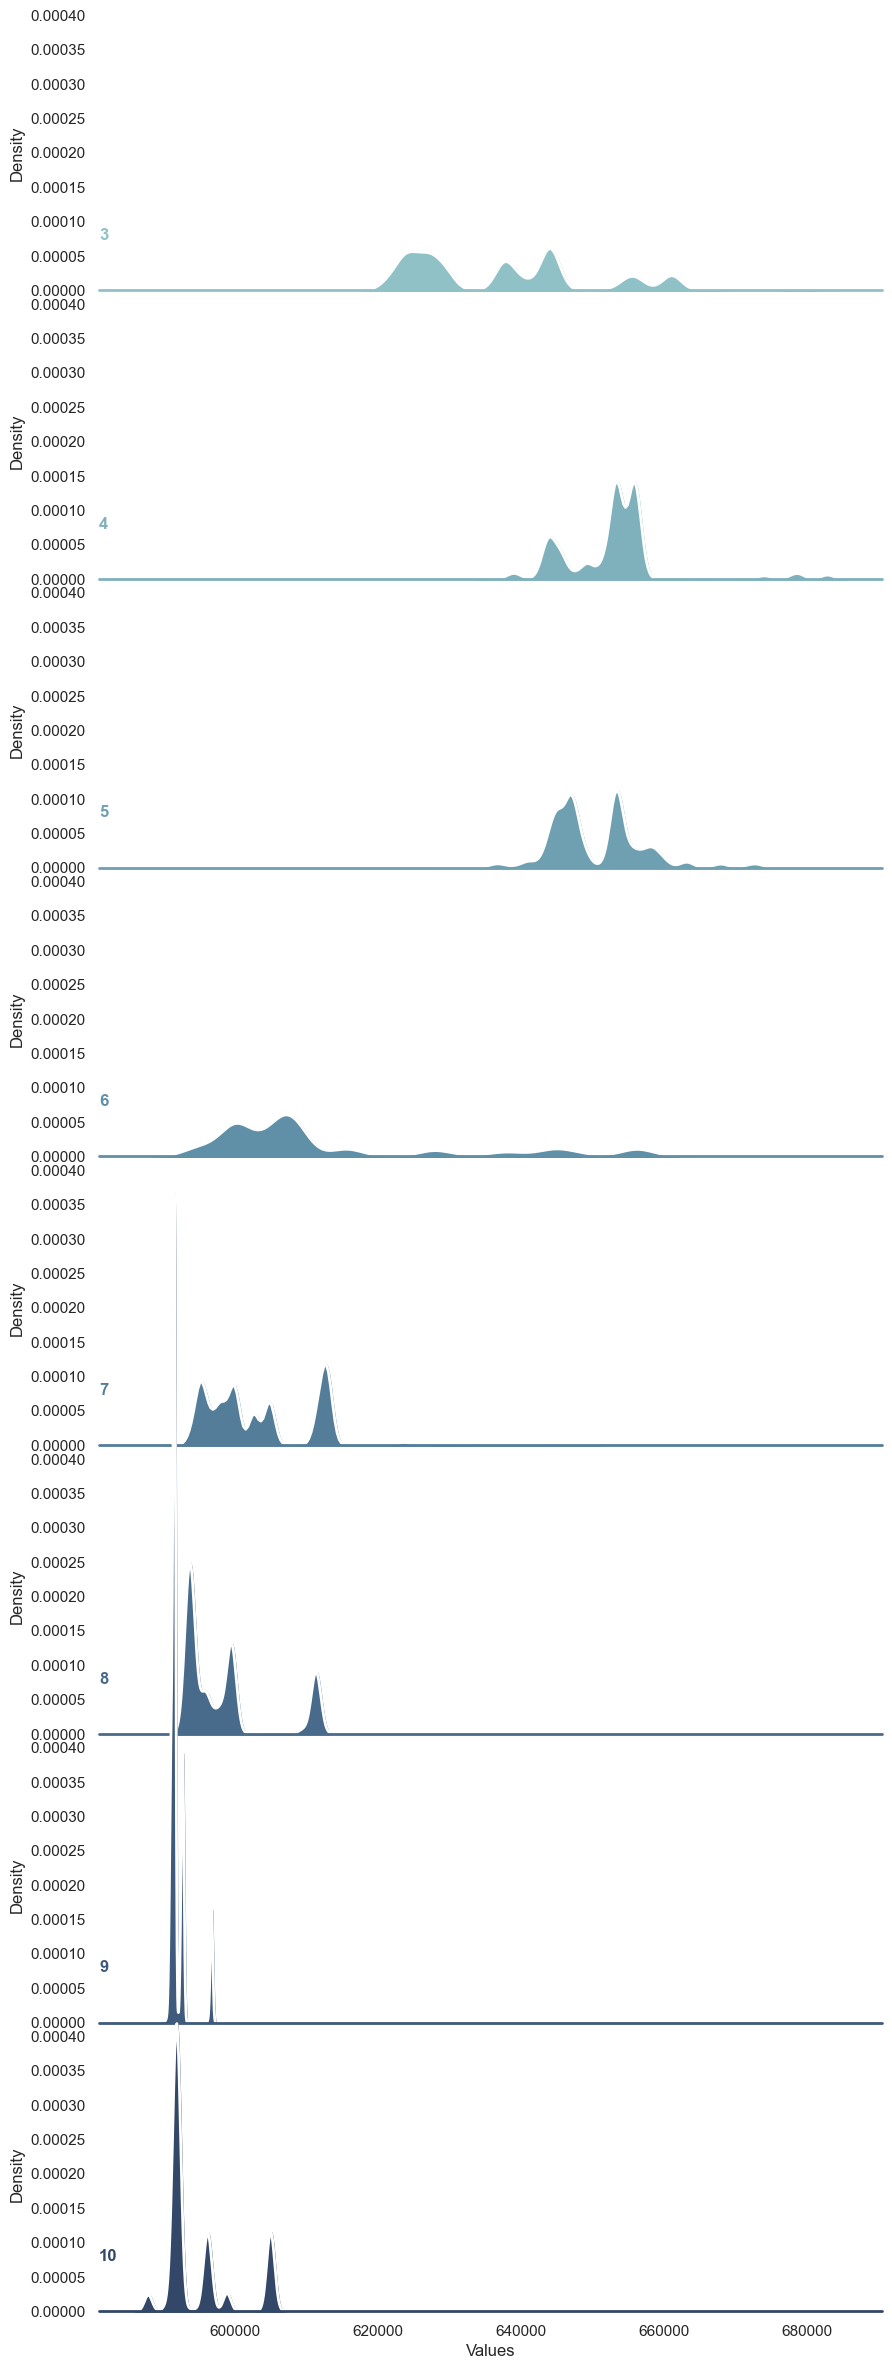

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_price_1, row="Month", hue="Month", aspect=3,  palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Values",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Values", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Values")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
# g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(ylim=(0, 0.0004))
plt.show()